This is the final project for the Data Science Masters Degree at Eastern University. It involves downloading and cleaning a dataset, building a model using that dataset, and deploying the model using Flask or a similar program. This notebook contains the data cleaning, merging, and model building code. I chose to combine seven datasets from Fangraphs, a baseball statistics website, and use data from two years prior to predict player home run totals for the next year. I used six datasets from 2021 and 2022 containing various statstics, and a 2023 dataset containg total home runs as the target value. The datasets used can be found here:
https://www.fangraphs.com/leaders/war?season=2022
https://www.fangraphs.com/leaders/war?season=2021
https://www.fangraphs.com/leaders/major-league?pos=all&stats=bat&lg=all&qual=y&type=0&season=2023&month=0&season1=2023&ind=0
https://www.fangraphs.com/leaders/major-league?pos=all&stats=bat&lg=all&qual=y&type=2&month=0&ind=0&startdate=&enddate=&season1=2022&season=2022
https://www.fangraphs.com/leaders/major-league?pos=all&stats=bat&lg=all&qual=y&type=24&month=0&ind=0&startdate=&enddate=&season1=2022&season=2022
https://www.fangraphs.com/leaders/major-league?pos=all&stats=bat&lg=all&qual=y&type=2&month=0&ind=0&startdate=&enddate=&season1=2021&season=2021
https://www.fangraphs.com/leaders/major-league?pos=all&stats=bat&lg=all&qual=y&type=24&month=0&ind=0&startdate=&enddate=&season1=2021&season=2021n=2021

In [1]:
# Importing libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Import and ispection of the 2021 csv files
mlb_bb_2021 = pd.read_csv('fangraphs_2021_bb.csv')
mlb_2021_sc = pd.read_csv('fangraphs_2021_sc.csv')
mlb_2021_war = pd.read_csv('fangraphs_2021_war.csv')
mlb_bb_2021.head()

,Name,Team,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH,...,BUH%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,NameASCII,PlayerId,MLBAMID
0,Tommy Hunter,NYM,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Tommy Hunter,1157,488984
1,Ross Detwiler,- - -,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Ross Detwiler,2859,446321
2,Daniel Bard,COL,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Daniel Bard,7115,453268
3,Hunter Strickland,- - -,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Hunter Strickland,7836,519326
4,Patrick Kivlehan,SDP,0.5,1.0,0.0,0.5,0.5,0.0,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Patrick Kivlehan,13910,623182


In [3]:
mlb_2021_sc.head()

,Name,Team,PA,Events,EV,maxEV,LA,Barrels,Barrel%,HardHit,HardHit%,AVG,xBA,SLG,xSLG,wOBA,xwOBA,NameASCII,PlayerId,MLBAMID
0,Daniel Bard,COL,1,1,99.854103,99.8541,10.6911,0.0,0.0,1.0,1.0,1.0,0.849,1.0,1.008,0.879055,0.803,Daniel Bard,7115,453268
1,Sean Reid-Foley,NYM,2,0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.691717,0.692,Sean Reid-Foley,17034,656887
2,Jake Brentz,KCR,1,0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.691717,0.692,Jake Brentz,17783,641394
3,Mario Feliciano,MIL,1,0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.691717,0.692,Mario Feliciano,20263,666128
4,Justin Bruihl,LAD,1,0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.691717,0.692,Justin Bruihl,23779,677865


In [4]:
mlb_2021_war.head()

,Name,Team,PA,IP,Bat WAR,Pit WAR,Total WAR,PlayerId
0,Shohei Ohtani,LAA,639.0,130.3333,5.051295,2.956798,8.008093,19755
1,Corbin Burnes,MIL,59.0,167.0000,0.145129,7.468717,7.613847,19361
2,Zack Wheeler,PHI,73.0,213.3333,0.101357,7.217054,7.318410,10310
3,Fernando Tatis Jr.,SDP,546.0,NaN,7.317665,NaN,7.317665,19709
4,Juan Soto,WSN,654.0,NaN,7.049085,NaN,7.049085,20123


In [5]:
# Creating copies of original dataframes in case of errors, also shortening the names to make them more convenient
bb2021 = mlb_bb_2021.copy()
sc2021 = mlb_2021_sc.copy()
war2021 = mlb_2021_war.copy()

In [6]:
# Checking for duplicates (Some players have the same name, but have different PlayerIds, meaning they are different players)
bb2021[bb2021.duplicated('PlayerId', keep=False)==True]

,Name,Team,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH,...,BUH%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,NameASCII,PlayerId,MLBAMID


In [7]:
sc2021[sc2021.duplicated('PlayerId', keep=False)==True]

,Name,Team,PA,Events,EV,maxEV,LA,Barrels,Barrel%,HardHit,HardHit%,AVG,xBA,SLG,xSLG,wOBA,xwOBA,NameASCII,PlayerId,MLBAMID


In [8]:
war2021[war2021.duplicated('PlayerId', keep=False)==True]

,Name,Team,PA,IP,Bat WAR,Pit WAR,Total WAR,PlayerId


In [9]:
# Renaming colummns for 2021 dataframes to differentiate from 2022 columns of the same name when merged later on.
bb2021map = {'BABIP':'BABIP_2021', 'GB/FB':'GB/FB_2021', 'LD%':'LD%_2021', 'GB%':'GB%_2021', 'FB%':'FB%_2021', 'IFFB%':'IFFB%_2021',
             'HR/FB':'HR/FB_2021', 'IFH':'IFH_2021', 'IFH%':'IFH%_2021', 'BUH':'BUH_2021', 'BUH%':'BUH%_2021', 'Pull%':'Pull%_2021', 
             'Cent%':'Cent%_2021', 'Oppo%':'Oppo%_2021', 'Soft%':'Soft%_2021', 'Med%':'Med%_2021', 'Hard%':'Hard%_2021'}
sc2021map = {'PA':'PA_2021', 'Events':'Events_2021', 'EV':'EV_2021', 'maxEV':'maxEV_2021', 'LA':'LA_2021', 'Barrels':'Barrels_2021', 
             'Barrel%':'Barrel%_2021', 'HardHit':'HardHit_2021', 'HardHit%':'HardHit%_2021', 'AVG':'AVG_2021', 'xBA':'xBA_2021', 'SLG':'SLG_2021',
             'xSLG':'xSLG_2021', 'wOBA':'wOBA_2021', 'xwOBA':'xwOBA_2021'}
war2021map = {'PA':'PA_2021', 'IP':'IP_2021', 'Bat WAR':'Bat_WAR_2021', 'Pit WAR':'Pit_WAR_2021', 'Total WAR':'Total_WAR_2021'}

In [10]:
bb2021.rename(mapper=bb2021map, axis=1, inplace=True)
sc2021.rename(mapper=sc2021map, axis=1, inplace=True)
war2021.rename(mapper=war2021map, axis=1, inplace=True)

In [11]:
# Resetting indices to make merging easier
sc2021.reset_index(drop=True, inplace=True)
war2021.reset_index(drop=True, inplace=True)

In [12]:
# Dropping columns from the war dataframe that also appear in the sc dataframe to avoid having duplicate columns. 
war2021.drop(columns=['Name', 'Team', 'PA_2021'], inplace=True)

In [13]:
mlb2021 = sc2021.merge(war2021, left_on='PlayerId', right_on='PlayerId')

In [14]:
mlb2021

,Name,Team,PA_2021,Events_2021,EV_2021,maxEV_2021,LA_2021,Barrels_2021,Barrel%_2021,HardHit_2021,...,xSLG_2021,wOBA_2021,xwOBA_2021,NameASCII,PlayerId,MLBAMID,IP_2021,Bat_WAR_2021,Pit_WAR_2021,Total_WAR_2021
0,Daniel Bard,COL,1,1,99.854103,99.8541,10.6911,0.0,0.0,1.0,...,1.008,0.879055,0.803,Daniel Bard,7115,453268,65.6666,0.059556,0.531407,0.590963
1,Sean Reid-Foley,NYM,2,0,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,0.691717,0.692,Sean Reid-Foley,17034,656887,20.6666,0.092843,0.125751,0.218594
2,Jake Brentz,KCR,1,0,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,0.691717,0.692,Jake Brentz,17783,641394,64.0000,0.045892,0.270411,0.316303
3,Mario Feliciano,MIL,1,0,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,0.691717,0.692,Mario Feliciano,20263,666128,NaN,0.043731,NaN,0.043731
4,Justin Bruihl,LAD,1,0,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,0.691717,0.692,Justin Bruihl,23779,677865,18.6666,0.046152,0.156176,0.202328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,Cooper Criswell,LAA,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,Cooper Criswell,24975,681867,1.3333,0.000000,0.030480,0.030480
1504,Brady Singer,KCR,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,Brady Singer,25377,663903,128.3333,0.000000,2.081826,2.081826
1505,Garrett Crochet,CHW,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,Garrett Crochet,27463,676979,54.3333,0.000000,1.373678,1.373678
1506,Hyeon-Jong Yang,TEX,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,Hyeon-Jong Yang,27513,660365,35.3333,0.000000,-0.350219,-0.350219


In [15]:
# Dropping duplicate columns for bb dataframe
bb2021.drop(columns=['Name', 'Team', 'NameASCII', 'MLBAMID'], inplace=True)

In [16]:
mlb2021 = mlb2021.merge(bb2021, left_on='PlayerId', right_on='PlayerId')

In [17]:
mlb2021

,Name,Team,PA_2021,Events_2021,EV_2021,maxEV_2021,LA_2021,Barrels_2021,Barrel%_2021,HardHit_2021,...,IFH_2021,IFH%_2021,BUH_2021,BUH%_2021,Pull%_2021,Cent%_2021,Oppo%_2021,Soft%_2021,Med%_2021,Hard%_2021
0,Daniel Bard,COL,1,1,99.854103,99.8541,10.6911,0.0,0.0,1.0,...,0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,Sean Reid-Foley,NYM,2,0,NaN,NaN,NaN,0.0,NaN,0.0,...,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Jake Brentz,KCR,1,0,NaN,NaN,NaN,0.0,NaN,0.0,...,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Mario Feliciano,MIL,1,0,NaN,NaN,NaN,0.0,NaN,0.0,...,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Justin Bruihl,LAD,1,0,NaN,NaN,NaN,0.0,NaN,0.0,...,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,Cooper Criswell,LAA,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1504,Brady Singer,KCR,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1505,Garrett Crochet,CHW,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1506,Hyeon-Jong Yang,TEX,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Performing the same steps with the 2022 csv files
mlb_2022_bb = pd.read_csv('fangraphs_2022_bb.csv')
mlb_2022_sc = pd.read_csv('fangraphs_2022_sc.csv')
mlb_2022_war = pd.read_csv('fangraphs_2022_war.csv')
bb2022 = mlb_2022_bb.copy()
sc2022 = mlb_2022_sc.copy()
war2022 = mlb_2022_war.copy()

In [19]:
bb2022.head()

,Name,Team,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH,...,BUH%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,NameASCII,PlayerId,MLBAMID
0,Ronnie Dawson,CIN,0.000000,1.0,0.000000,1.000000,0.000000,0.0,0.0,0,...,0.0,1.0,0.0000,0.0000,0.0,0.0000,1.0000,Ronnie Dawson,19710,669008
1,Liover Peguero,PIT,1.000000,1.0,0.000000,1.000000,0.000000,0.0,0.0,0,...,0.0,0.0,0.0000,1.0000,0.0,0.0000,1.0000,Liover Peguero,24273,678894
2,James Outman,LAD,1.000000,1.0,0.333333,0.333333,0.333333,0.0,0.5,0,...,0.0,0.5,0.3333,0.1667,0.0,0.1667,0.8333,James Outman,24770,681546
3,Monte Harrison,LAA,0.500000,2.0,0.000000,0.666667,0.333333,0.0,1.0,0,...,0.0,0.0,0.3333,0.6667,0.0,0.3333,0.6667,Monte Harrison,17216,656509
4,Narciso Crook,CHC,0.333333,3.0,0.333333,0.500000,0.166667,0.0,0.0,0,...,0.0,0.5,0.5000,0.0000,0.0,0.3333,0.6667,Narciso Crook,17473,643271


In [20]:
sc2022.head()

,Name,Team,PA,Events,EV,maxEV,LA,Barrels,Barrel%,HardHit,HardHit%,AVG,xBA,SLG,xSLG,wOBA,xwOBA,NameASCII,PlayerId,MLBAMID
0,Khalil Lee,NYM,2,2,82.129501,104.544,-0.441118,1.0,0.5000,1.0,0.5000,0.500000,0.455,2.000000,1.725,1.036000,0.911,Khalil Lee,19952,666137
1,Evan Phillips,LAD,1,0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.000000,NaN,0.000000,NaN,0.688744,0.689,Evan Phillips,17734,623465
2,Chadwick Tromp,ATL,4,4,92.448502,103.499,4.486725,0.0,0.0000,2.0,0.5000,0.750000,0.486,1.250000,0.670,0.851703,0.503,Chadwick Tromp,16953,644433
3,Aaron Judge,NYY,696,404,95.778695,118.357,14.893032,106.0,0.2624,246.0,0.6089,0.310526,0.305,0.685965,0.706,0.458196,0.463,Aaron Judge,15640,592450
4,Yordan Alvarez,HOU,561,371,95.218644,117.447,12.251698,78.0,0.2102,222.0,0.5984,0.306383,0.329,0.612766,0.672,0.426570,0.462,Yordan Alvarez,19556,670541


In [21]:
war2022.head()

,Name,Team,PA,IP,Bat WAR,Pit WAR,Total WAR,PlayerId
0,Aaron Judge,NYY,696.0,NaN,11.587293,NaN,11.587293,15640
1,Shohei Ohtani,LAA,666.0,166.0,3.839049,5.598513,9.437562,19755
2,Manny Machado,SDP,644.0,NaN,7.492044,NaN,7.492044,11493
3,Nolan Arenado,STL,620.0,NaN,7.179614,NaN,7.179614,9777
4,Freddie Freeman,LAD,708.0,NaN,7.082030,NaN,7.082030,5361


In [22]:
sc2022[sc2022.duplicated('PlayerId', keep=False)==True]

,Name,Team,PA,Events,EV,maxEV,LA,Barrels,Barrel%,HardHit,HardHit%,AVG,xBA,SLG,xSLG,wOBA,xwOBA,NameASCII,PlayerId,MLBAMID


In [23]:
bb2022[bb2022.duplicated('PlayerId', keep=False)==True]

,Name,Team,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH,...,BUH%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,NameASCII,PlayerId,MLBAMID


In [24]:
war2022[war2022.duplicated('PlayerId', keep=False)==True]

,Name,Team,PA,IP,Bat WAR,Pit WAR,Total WAR,PlayerId


In [25]:
bb2022map = {'BABIP':'BABIP_2022', 'GB/FB':'GB/FB_2022', 'LD%':'LD%_2022', 'GB%':'GB%_2022', 'FB%':'FB%_2022', 'IFFB%':'IFFB%_2022',
             'HR/FB':'HR/FB_2022', 'IFH':'IFH_2022', 'IFH%':'IFH%_2022', 'BUH':'BUH_2022', 'BUH%':'BUH%_2022', 'Pull%':'Pull%_2022', 
             'Cent%':'Cent%_2022', 'Oppo%':'Oppo%_2022', 'Soft%':'Soft%_2022', 'Med%':'Med%_2022', 'Hard%':'Hard%_2022'}
sc2022map = {'PA':'PA_2022', 'Events':'Events_2022', 'EV':'EV_2022', 'maxEV':'maxEV_2022', 'LA':'LA_2022', 'Barrels':'Barrels_2022', 
             'Barrel%':'Barrel%_2022', 'HardHit':'HardHit_2022', 'HardHit%':'HardHit%_2022', 'AVG':'AVG_2022', 'xBA':'xBA_2022', 'SLG':'SLG_2022',
             'xSLG':'xSLG_2022', 'wOBA':'wOBA_2022', 'xwOBA':'xwOBA_2022'}
war2022map = {'PA':'PA_2022', 'IP':'IP_2022', 'Bat WAR':'Bat_WAR_2022', 'Pit WAR':'Pit_WAR_2022', 'Total WAR':'Total_WAR_2022'}
bb2022.rename(mapper=bb2022map, axis=1, inplace=True)
sc2022.rename(mapper=sc2022map, axis=1, inplace=True)
war2022.rename(mapper=war2022map, axis=1, inplace=True)

In [26]:
sc2022.reset_index(drop=True, inplace=True)
war2022.drop(columns=['Name', 'Team', 'PA_2022'], inplace=True)
mlb2022 = sc2022.merge(war2022, left_on='PlayerId', right_on='PlayerId')

In [27]:
bb2022.drop(columns=['Name', 'Team', 'NameASCII', 'MLBAMID'], inplace=True)
mlb2022 = mlb2022.merge(bb2022, left_on='PlayerId', right_on='PlayerId')

In [28]:
# Dropping Name and Team columns from the 2022 dataframe and merging with the 2021 dataframe
mlb2022.drop(columns=['Name', 'Team'], inplace=True)
mlbtotal = mlb2021.merge(mlb2022, left_on='PlayerId', right_on='PlayerId')
mlbtotal.head()

,Name,Team,PA_2021,Events_2021,EV_2021,maxEV_2021,LA_2021,Barrels_2021,Barrel%_2021,HardHit_2021,...,IFH_2022,IFH%_2022,BUH_2022,BUH%_2022,Pull%_2022,Cent%_2022,Oppo%_2022,Soft%_2022,Med%_2022,Hard%_2022
0,Daniel Bard,COL,1,1,99.854103,99.8541,10.6911,0.0,0.0,1.0,...,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Sean Reid-Foley,NYM,2,0,NaN,NaN,NaN,0.0,NaN,0.0,...,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Jake Brentz,KCR,1,0,NaN,NaN,NaN,0.0,NaN,0.0,...,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Mario Feliciano,MIL,1,0,NaN,NaN,NaN,0.0,NaN,0.0,...,0,0.0,0,0.0,0.3333,0.3333,0.3333,0.3333,0.3333,0.3333
4,Justin Bruihl,LAD,1,0,NaN,NaN,NaN,0.0,NaN,0.0,...,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Reading in 2023 dataframe, dropping all columns except for the target (HR) and the merge column (PlayerId)
mlb_2023 = pd.read_csv('fangraphs_2023.csv')
hr2023 = mlb_2023.copy()
hr2023.head()

,Name,Team,Age,G,AB,PA,H,1B,2B,3B,...,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,NameASCII,PlayerId,MLBAMID
0,Josh Sborz,TEX,29,44,1,1,0,0,0,0,...,NaN,NaN,0.0,NaN,0,0.7500,0.7500,Josh Sborz,18323,622250
1,Chris Okey,LAA,28,2,2,2,0,0,0,0,...,NaN,NaN,0.0,NaN,0,0.4286,0.7143,Chris Okey,19245,608360
2,Shelby Miller,LAD,32,36,1,1,0,0,0,0,...,0.0,71.5484,0.0,0.0,1,0.6667,0.6667,Shelby Miller,10197,571946
3,Charlie Culberson,ATL,34,1,1,1,1,1,0,0,...,0.0,80.7977,0.0,0.0,1,0.0000,0.5000,Charlie Culberson,3298,518586
4,Billy Hamilton,CHW,32,3,2,2,0,0,0,0,...,0.0,NaN,0.0,0.0,1,0.1250,0.5000,Billy Hamilton,10199,571740


In [30]:
hr = hr2023[['HR', 'PlayerId']]
hr[hr.duplicated('PlayerId', keep=False)==True]

,HR,PlayerId


In [31]:
mlb_full = mlbtotal.merge(hr, left_on='PlayerId', right_on='PlayerId')
mlb_full

,Name,Team,PA_2021,Events_2021,EV_2021,maxEV_2021,LA_2021,Barrels_2021,Barrel%_2021,HardHit_2021,...,IFH%_2022,BUH_2022,BUH%_2022,Pull%_2022,Cent%_2022,Oppo%_2022,Soft%_2022,Med%_2022,Hard%_2022,HR
0,Daniel Bard,COL,1,1,99.854103,99.8541,10.69110,0.0,0.0,1.0,...,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Sean Reid-Foley,NYM,2,0,NaN,NaN,NaN,0.0,NaN,0.0,...,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Justin Bruihl,LAD,1,0,NaN,NaN,NaN,0.0,NaN,0.0,...,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Tommy Hunter,NYM,1,1,99.745399,99.7454,8.75594,0.0,0.0,1.0,...,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Matthew Boyd,DET,5,3,93.271004,94.2053,14.77260,0.0,0.0,0.0,...,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,Janson Junk,LAA,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
844,Andrew Wantz,LAA,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
845,Austin Warren,LAA,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
846,Cooper Criswell,LAA,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [32]:
# Dropping columns not related to batting statistics. Innings pitched, pit war, and total war will be dropped, in addition 
# to columns not related to statistics at all, such as name and id. Total war is the sum of bat war and pit war. 
# Most hitters have 0 pit war because they do not pitch. The total and bat war is identical for most players in the dataframe
# because of this. 
mlb_full.drop(columns=['Name', 'Team', 'NameASCII_x', 'PlayerId', 'MLBAMID_x', 'NameASCII_y', 'MLBAMID_y', 'IP_2021', 'IP_2022',
                 'Pit_WAR_2021', 'Pit_WAR_2022', 'Total_WAR_2021', 'Total_WAR_2022'], inplace=True)

In [33]:
# Creating copy in case of errors later on
mlb = mlb_full.copy()

In [34]:
# Because the dataset uses data from two consecutive years, I thought columns containing the averages might be helpful to the model
# Perhaps they could be better predictors
mlb['AVG_PA'] = round((mlb['PA_2021'] + mlb['PA_2022']) / 2)
mlb['AVG_Events'] = (mlb['Events_2021'] + mlb['Events_2022']) / 2
mlb['AVG_EV'] = (mlb['EV_2021'] + mlb['EV_2022']) / 2
mlb['AVG_max_EV'] = (mlb['maxEV_2021'] + mlb['maxEV_2022']) / 2
mlb['AVG_LA'] = (mlb['LA_2021'] + mlb['LA_2022']) / 2
mlb['AVG_Barrels'] = (mlb['Barrels_2021'] + mlb['Barrels_2022']) / 2
mlb['AVG_Barrel%'] = (mlb['Barrel%_2021'] + mlb['Barrel%_2022']) / 2
mlb['AVG_HardHit'] = (mlb['HardHit_2021'] + mlb['HardHit_2022']) / 2
mlb['AVG_HardHit%'] = (mlb['HardHit%_2021'] + mlb['HardHit%_2022']) / 2
mlb['AVG_BA'] = (mlb['AVG_2021'] + mlb['AVG_2022']) / 2
mlb['AVG_xBA'] = (mlb['xBA_2021'] + mlb['xBA_2022']) / 2
mlb['AVG_SLG'] = (mlb['SLG_2021'] + mlb['SLG_2022']) / 2
mlb['AVG_xSLG'] = (mlb['xSLG_2021'] + mlb['xSLG_2022']) / 2
mlb['AVG_wOBA'] = (mlb['wOBA_2021'] + mlb['wOBA_2022']) / 2
mlb['AVG_xwOBA'] = (mlb['xwOBA_2021'] + mlb['xwOBA_2022']) / 2
mlb['AVG_WAR'] = (mlb['Bat_WAR_2021'] + mlb['Bat_WAR_2022']) / 2
mlb['AVG_BABIP'] = (mlb['BABIP_2021'] + mlb['BABIP_2022']) / 2
mlb['AVG_GB/FB'] = (mlb['GB/FB_2021'] + mlb['GB/FB_2022']) / 2
mlb['AVG_LD%'] = (mlb['LD%_2021'] + mlb['LD%_2022']) / 2
mlb['AVG_GB%'] = (mlb['GB%_2021'] + mlb['GB%_2022']) / 2
mlb['AVG_FB%'] = (mlb['FB%_2021'] + mlb['FB%_2022']) / 2
mlb['AVG_IFFB%'] = (mlb['IFFB%_2021'] + mlb['IFFB%_2022']) / 2
mlb['AVG_HR/FB'] = (mlb['HR/FB_2021'] + mlb['HR/FB_2022']) / 2
mlb['AVG_IFH'] = (mlb['IFH_2021'] + mlb['IFH_2022']) / 2
mlb['AVG_IFH%'] = (mlb['IFH%_2021'] + mlb['IFH%_2022']) / 2
mlb['AVG_BUH'] = (mlb['BUH_2021'] + mlb['BUH_2022']) / 2
mlb['AVG_BUH%'] = (mlb['BUH%_2021'] + mlb['BUH%_2022']) / 2
mlb['AVG_Pull%'] = (mlb['Pull%_2021'] + mlb['Pull%_2022']) / 2
mlb['AVG_Cent%'] = (mlb['Cent%_2021'] + mlb['Cent%_2022']) / 2
mlb['AVG_Oppo%'] = (mlb['Oppo%_2021'] + mlb['Oppo%_2022']) / 2
mlb['AVG_Soft%'] = (mlb['Soft%_2021'] + mlb['Soft%_2022']) / 2
mlb['AVG_Med%'] = (mlb['Med%_2021'] + mlb['Med%_2022']) / 2
mlb['AVG_Hard%'] = (mlb['Hard%_2021'] + mlb['Hard%_2022']) / 2

In [35]:
mlb.head()

,PA_2021,Events_2021,EV_2021,maxEV_2021,LA_2021,Barrels_2021,Barrel%_2021,HardHit_2021,HardHit%_2021,AVG_2021,...,AVG_IFH,AVG_IFH%,AVG_BUH,AVG_BUH%,AVG_Pull%,AVG_Cent%,AVG_Oppo%,AVG_Soft%,AVG_Med%,AVG_Hard%
0,1,1,99.854103,99.8541,10.69110,0.0,0.0,1.0,1.0,1.000000,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.000000,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.000000,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,99.745399,99.7454,8.75594,0.0,0.0,1.0,1.0,1.000000,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3,93.271004,94.2053,14.77260,0.0,0.0,0.0,0.0,0.333333,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Dropping rows with AVG_PA < 100. Most of the statistics in the dataset give a greater indication of player performance if they are built from 
# a higher sample size (PA). Taking the AVG_PA allows players who may have been injured a significant amount for one of the years, but played a decent
# amount in the other to be included. 
mlb.drop(mlb[mlb['AVG_PA']<100].index, inplace=True)
mlb

,PA_2021,Events_2021,EV_2021,maxEV_2021,LA_2021,Barrels_2021,Barrel%_2021,HardHit_2021,HardHit%_2021,AVG_2021,...,AVG_IFH,AVG_IFH%,AVG_BUH,AVG_BUH%,AVG_Pull%,AVG_Cent%,AVG_Oppo%,AVG_Soft%,AVG_Med%,AVG_Hard%
5,35,17,92.273531,109.6730,16.885471,6.0,0.3529,10.0,0.5882,0.250000,...,1.5,0.037500,0.0,0.000000,0.63030,0.20335,0.16640,0.10570,0.38925,0.50505
7,2,1,43.310501,43.3105,-62.689899,0.0,0.0000,0.0,0.0000,1.000000,...,2.0,0.536585,0.0,0.000000,0.14655,0.20690,0.64655,0.58190,0.28450,0.13360
9,599,360,92.479489,116.3300,13.293333,65.0,0.1806,177.0,0.4917,0.309426,...,7.5,0.056679,2.5,0.388889,0.39200,0.34635,0.26165,0.11390,0.49360,0.39250
10,360,217,93.844446,117.9320,18.217871,44.0,0.2028,117.0,0.5392,0.282828,...,11.5,0.091643,0.0,0.000000,0.45740,0.34405,0.19850,0.15460,0.47885,0.36650
11,654,414,92.953513,116.5750,5.772688,55.0,0.1329,217.0,0.5242,0.312749,...,11.5,0.054692,0.5,0.500000,0.34620,0.40780,0.24595,0.17665,0.48050,0.34285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,312,209,85.707649,109.9690,18.889439,8.0,0.0383,62.0,0.2967,0.178322,...,4.0,0.050850,0.0,0.000000,0.44715,0.34540,0.20750,0.20155,0.57685,0.22160
420,148,88,87.957159,113.1100,17.065568,6.0,0.0682,31.0,0.3523,0.179856,...,5.0,0.095486,0.0,0.000000,0.48915,0.29795,0.21290,0.19270,0.51555,0.29175
424,104,56,87.968604,106.6070,16.192400,5.0,0.0893,19.0,0.3393,0.182796,...,2.0,0.070455,0.0,0.000000,0.38865,0.28100,0.33035,0.14235,0.56405,0.29360
425,220,140,87.310946,106.0480,20.025036,3.0,0.0214,37.0,0.2643,0.183168,...,2.0,0.070513,0.0,0.000000,0.48230,0.26955,0.24810,0.20190,0.58290,0.21520


In [37]:
# Checking for null values
mlb[mlb.isnull().any(axis=1)]

,PA_2021,Events_2021,EV_2021,maxEV_2021,LA_2021,Barrels_2021,Barrel%_2021,HardHit_2021,HardHit%_2021,AVG_2021,...,AVG_IFH,AVG_IFH%,AVG_BUH,AVG_BUH%,AVG_Pull%,AVG_Cent%,AVG_Oppo%,AVG_Soft%,AVG_Med%,AVG_Hard%


In [38]:
mlbcorrdf = mlb.corr()

In [39]:
# Dropping columns with correlation values between -0.3 and 0.3 to cut down the number of features. These features are in the lower
# spectrum of correlation values and keeping them may complicate/decrease the performance of the model due to how the random forest 
# works (selecting rqndom features). 
mlbcorrdf = mlb.corr()
df_elim = mlbcorrdf[mlbcorrdf['HR'].between(-0.3, 0.3)]
mlb.drop(columns=df_elim.index, inplace=True)
mlb

,PA_2021,Events_2021,Barrels_2021,Barrel%_2021,HardHit_2021,HardHit%_2021,xBA_2021,SLG_2021,xSLG_2021,wOBA_2021,...,AVG_HardHit%,AVG_xBA,AVG_SLG,AVG_xSLG,AVG_wOBA,AVG_xwOBA,AVG_WAR,AVG_HR/FB,AVG_Med%,AVG_Hard%
5,35,17,6.0,0.3529,10.0,0.5882,0.298,0.714286,0.777,0.453367,...,0.52850,0.2745,0.610568,0.6365,0.411833,0.4290,1.460076,0.380000,0.38925,0.50505
7,2,1,0.0,0.0000,0.0,0.0000,0.171,1.000000,0.175,0.785386,...,0.18535,0.1915,0.671271,0.2570,0.530600,0.3575,0.181707,0.022222,0.28450,0.13360
9,599,360,65.0,0.1806,177.0,0.4917,0.301,0.614754,0.609,0.430898,...,0.48550,0.2945,0.564134,0.5680,0.400114,0.4050,4.498216,0.224497,0.49360,0.39250
10,360,217,44.0,0.2028,117.0,0.5392,0.295,0.595960,0.603,0.411972,...,0.51815,0.2835,0.504618,0.5435,0.373693,0.3970,3.308469,0.185315,0.47885,0.36650
11,654,414,55.0,0.1329,217.0,0.5242,0.305,0.533865,0.545,0.420240,...,0.49870,0.2855,0.493077,0.5230,0.398045,0.4150,5.451364,0.207836,0.48050,0.34285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,312,209,8.0,0.0383,62.0,0.2967,0.191,0.307692,0.287,0.227140,...,0.25970,0.1855,0.277996,0.2740,0.226058,0.2330,-0.161661,0.092398,0.57685,0.22160
420,148,88,6.0,0.0682,31.0,0.3523,0.179,0.309353,0.292,0.230719,...,0.39355,0.1975,0.399271,0.3765,0.280303,0.2755,2.129693,0.120745,0.51555,0.29175
424,104,56,5.0,0.0893,19.0,0.3393,0.145,0.376344,0.291,0.265413,...,0.35450,0.1760,0.379183,0.3085,0.294426,0.2510,0.974388,0.131818,0.56405,0.29360
425,220,140,3.0,0.0214,37.0,0.2643,0.170,0.267327,0.258,0.225179,...,0.26260,0.1785,0.239297,0.2480,0.235761,0.2395,-0.542676,0.033333,0.58290,0.21520


In [40]:
# Looking at the highest correlated features with the target value and removing lesser correlated features having a correlation 
# value >=0.8 or <= -0.8 with them. ALso removing either the average value for each stat, or the two values that make up that value, 
# whichever is less correlated.
mlb.corr()['HR'].sort_values(ascending=False)

HR               1.000000
Barrels_2022     0.702595
AVG_Barrels      0.677495
HardHit_2022     0.614774
AVG_HardHit      0.581331
AVG_xSLG         0.572669
AVG_WAR          0.564437
xSLG_2022        0.554112
AVG_SLG          0.552040
AVG_xwOBA        0.551931
Barrels_2021     0.549347
PA_2022          0.541978
Bat_WAR_2022     0.540998
AVG_PA           0.502712
SLG_2022         0.500060
AVG_wOBA         0.493569
Barrel%_2022     0.491740
xwOBA_2022       0.491398
Events_2022      0.490071
xSLG_2021        0.475124
xwOBA_2021       0.473272
AVG_HardHit%     0.468232
HardHit%_2022    0.460703
HardHit_2021     0.458125
AVG_Barrel%      0.453280
Hard%_2022       0.451273
EV_2022          0.450352
wOBA_2022        0.449751
AVG_Events       0.447351
Bat_WAR_2021     0.446521
AVG_Hard%        0.443760
maxEV_2022       0.421955
SLG_2021         0.407621
HR/FB_2022       0.406866
AVG_EV           0.406059
AVG_max_EV       0.402484
HardHit%_2021    0.401735
AVG_HR/FB        0.371924
PA_2021     

In [41]:
# Dropping either the lesser correlated of the average feature, or the two features that make up the average
mlb.drop(columns=['AVG_Barrels', 'AVG_HardHit', 'xSLG_2022', 'xSLG_2021', 'Bat_WAR_2022', 'Bat_WAR_2021', 'AVG_PA', 'SLG_2022',
                  'SLG_2021', 'xwOBA_2022', 'xwOBA_2021', 'wOBA_2022', 'wOBA_2021', 'AVG_Barrel%', 'AVG_Events', 'HardHit%_2021', 'HardHit%_2022',
                  'AVG_Barrel%', 'AVG_Hard%', 'AVG_EV', 'AVG_max_EV', 'AVG_HR/FB', 'xBA_2021', 'Med%_2022'], inplace=True)

In [42]:
mlb.corr()['HR'].sort_values(ascending=False)

HR              1.000000
Barrels_2022    0.702595
HardHit_2022    0.614774
AVG_xSLG        0.572669
AVG_WAR         0.564437
AVG_SLG         0.552040
AVG_xwOBA       0.551931
Barrels_2021    0.549347
PA_2022         0.541978
AVG_wOBA        0.493569
Barrel%_2022    0.491740
Events_2022     0.490071
AVG_HardHit%    0.468232
HardHit_2021    0.458125
Hard%_2022      0.451273
EV_2022         0.450352
maxEV_2022      0.421955
HR/FB_2022      0.406866
PA_2021         0.363497
Barrel%_2021    0.348672
AVG_xBA         0.333008
Events_2021     0.320870
Hard%_2021      0.314386
IFH_2022        0.301197
AVG_Med%       -0.346546
Name: HR, dtype: float64

In [43]:
# Using 10 as the cutoff for variance inflation factor. I am using this metric in addition to correlation to detect multicollinearity.
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
mlb_vif = mlb.drop('HR', axis = 1)
mlb_vif = add_constant(mlb_vif)
mlb_vif_df = pd.DataFrame()
mlb_vif_df['variables'] = mlb_vif.columns
mlb_vif_df['vif'] = [variance_inflation_factor(mlb_vif.values, i)
                    for i in range(len(mlb_vif.columns))]
mlb_vif_df

,variables,vif
0,const,8497.898326
1,PA_2021,80.317804
2,Events_2021,109.875055
3,Barrels_2021,19.819793
4,Barrel%_2021,9.845560
5,HardHit_2021,61.383770
6,Hard%_2021,4.123685
7,PA_2022,86.023877
8,Events_2022,117.902429
9,EV_2022,7.111535


In [44]:
# The next few cells are looking at correlation columns of the features most greatly correlated with HR, and dropping features
# highly correlated with them (above 0.8 and below -0.8)
# Using 10 as the cutoff for variance inflation factor. I am using this metric in addition to correlation to detect multicollinearity.
mlb.corr()['Barrels_2022'].sort_values(ascending=False)

Barrels_2022    1.000000
HardHit_2022    0.840597
AVG_xSLG        0.760578
PA_2022         0.757271
Barrel%_2022    0.732688
HR              0.702595
AVG_xwOBA       0.702525
AVG_SLG         0.699342
Barrels_2021    0.695362
Events_2022     0.665946
AVG_HardHit%    0.665080
AVG_WAR         0.664098
EV_2022         0.640875
HR/FB_2022      0.626775
AVG_wOBA        0.616929
maxEV_2022      0.594410
HardHit_2021    0.592109
Hard%_2022      0.588519
Barrel%_2021    0.479869
PA_2021         0.477820
AVG_xBA         0.471561
Hard%_2021      0.440086
Events_2021     0.413465
IFH_2022        0.389969
AVG_Med%       -0.405479
Name: Barrels_2022, dtype: float64

In [45]:
mlb.corr()['Barrels_2021'].sort_values(ascending=False)

Barrels_2021    1.000000
HardHit_2021    0.847617
PA_2021         0.766933
AVG_xSLG        0.712782
Barrels_2022    0.695362
Events_2021     0.683261
AVG_xwOBA       0.645444
AVG_WAR         0.615108
AVG_SLG         0.605438
HardHit_2022    0.602226
Barrel%_2021    0.586192
AVG_HardHit%    0.572052
HR              0.549347
PA_2022         0.521843
AVG_wOBA        0.521188
Barrel%_2022    0.520780
EV_2022         0.497726
Hard%_2021      0.497204
Events_2022     0.453814
maxEV_2022      0.439447
Hard%_2022      0.430131
AVG_xBA         0.393358
HR/FB_2022      0.392851
IFH_2022        0.266817
AVG_Med%       -0.366066
Name: Barrels_2021, dtype: float64

In [46]:
# Creating a copy of original df and changing, adding together, removing features the copy 
mlb_changed = mlb.copy()

In [47]:
# From past experience, HardHit has a significant correlation with multiple variables. I have tried transforming it, combining it with other variables,
# taking the average. It always ends up contributing to multicollinearity, so I am removing it now. 
mlb_changed.drop(columns=['HardHit_2021', 'HardHit_2022'], inplace=True)

In [48]:
mlb_changed.corr()['Barrels_2021'].sort_values(ascending=False)

Barrels_2021    1.000000
PA_2021         0.766933
AVG_xSLG        0.712782
Barrels_2022    0.695362
Events_2021     0.683261
AVG_xwOBA       0.645444
AVG_WAR         0.615108
AVG_SLG         0.605438
Barrel%_2021    0.586192
AVG_HardHit%    0.572052
HR              0.549347
PA_2022         0.521843
AVG_wOBA        0.521188
Barrel%_2022    0.520780
EV_2022         0.497726
Hard%_2021      0.497204
Events_2022     0.453814
maxEV_2022      0.439447
Hard%_2022      0.430131
AVG_xBA         0.393358
HR/FB_2022      0.392851
IFH_2022        0.266817
AVG_Med%       -0.366066
Name: Barrels_2021, dtype: float64

In [49]:
mlb_vif = mlb_changed.drop('HR', axis = 1)
mlb_vif = add_constant(mlb_vif)
mlb_vif_df = pd.DataFrame()
mlb_vif_df['variables'] = mlb_vif.columns
mlb_vif_df['vif'] = [variance_inflation_factor(mlb_vif.values, i)
                    for i in range(len(mlb_vif.columns))]
mlb_vif_df

,variables,vif
0,const,7809.795350
1,PA_2021,78.166194
2,Events_2021,69.058139
3,Barrels_2021,10.221067
4,Barrel%_2021,8.343880
5,Hard%_2021,3.749992
6,PA_2022,80.311540
7,Events_2022,79.870044
8,EV_2022,6.284711
9,maxEV_2022,2.838158


In [50]:
mlb_changed.corr()['HR'].sort_values(ascending=False)

HR              1.000000
Barrels_2022    0.702595
AVG_xSLG        0.572669
AVG_WAR         0.564437
AVG_SLG         0.552040
AVG_xwOBA       0.551931
Barrels_2021    0.549347
PA_2022         0.541978
AVG_wOBA        0.493569
Barrel%_2022    0.491740
Events_2022     0.490071
AVG_HardHit%    0.468232
Hard%_2022      0.451273
EV_2022         0.450352
maxEV_2022      0.421955
HR/FB_2022      0.406866
PA_2021         0.363497
Barrel%_2021    0.348672
AVG_xBA         0.333008
Events_2021     0.320870
Hard%_2021      0.314386
IFH_2022        0.301197
AVG_Med%       -0.346546
Name: HR, dtype: float64

In [51]:
# PA and Events are highly correlated. PA has a higher correlation to HR, so I will drop Events
mlb_changed.drop(columns=['Events_2021', 'Events_2022'], inplace=True)

In [52]:
mlb_vif = mlb_changed.drop('HR', axis = 1)
mlb_vif = add_constant(mlb_vif)
mlb_vif_df = pd.DataFrame()
mlb_vif_df['variables'] = mlb_vif.columns
mlb_vif_df['vif'] = [variance_inflation_factor(mlb_vif.values, i)
                    for i in range(len(mlb_vif.columns))]
mlb_vif_df

,variables,vif
0,const,7650.025846
1,PA_2021,5.923493
2,Barrels_2021,9.260701
3,Barrel%_2021,7.914139
4,Hard%_2021,3.652713
5,PA_2022,8.802642
6,EV_2022,6.071196
7,maxEV_2022,2.819593
8,Barrels_2022,14.243301
9,Barrel%_2022,11.773653


In [53]:
mlb_changed.corr()['PA_2021'].sort_values(ascending=False)

PA_2021         1.000000
Barrels_2021    0.766933
PA_2022         0.602783
AVG_WAR         0.601013
Barrels_2022    0.477820
AVG_xBA         0.431203
AVG_xwOBA       0.416175
AVG_xSLG        0.394903
IFH_2022        0.389930
HR              0.363497
AVG_wOBA        0.354051
AVG_SLG         0.347438
AVG_HardHit%    0.232057
Hard%_2021      0.223719
EV_2022         0.213589
maxEV_2022      0.208711
Hard%_2022      0.166426
Barrel%_2022    0.160655
Barrel%_2021    0.132113
HR/FB_2022      0.105663
AVG_Med%       -0.085230
Name: PA_2021, dtype: float64

In [54]:
# Transforming PA to hopefully eliminate multicollinearity with regards to it
mlb_changed['sPA_2021'] = np.sqrt(mlb_changed['PA_2021'])
mlb_changed['sPA_2022'] = np.sqrt(mlb_changed['PA_2022'])
mlb_changed.drop(columns=['PA_2022', 'PA_2021'], inplace=True)
mlb_vif = mlb_changed.drop('HR', axis = 1)
mlb_vif = add_constant(mlb_vif)
mlb_vif_df = pd.DataFrame()
mlb_vif_df['variables'] = mlb_vif.columns
mlb_vif_df['vif'] = [variance_inflation_factor(mlb_vif.values, i)
                    for i in range(len(mlb_vif.columns))]
mlb_vif_df

,variables,vif
0,const,7726.260020
1,Barrels_2021,8.423172
2,Barrel%_2021,8.191339
3,Hard%_2021,3.822142
4,EV_2022,6.076598
5,maxEV_2022,2.893971
6,Barrels_2022,10.883472
7,Barrel%_2022,10.878536
8,HR/FB_2022,3.243843
9,IFH_2022,2.202799


In [55]:
mlb_changed.corr()['HR'].sort_values(ascending=False)

HR              1.000000
Barrels_2022    0.702595
AVG_xSLG        0.572669
AVG_WAR         0.564437
AVG_SLG         0.552040
AVG_xwOBA       0.551931
Barrels_2021    0.549347
sPA_2022        0.502653
AVG_wOBA        0.493569
Barrel%_2022    0.491740
AVG_HardHit%    0.468232
Hard%_2022      0.451273
EV_2022         0.450352
maxEV_2022      0.421955
HR/FB_2022      0.406866
Barrel%_2021    0.348672
AVG_xBA         0.333008
sPA_2021        0.332941
Hard%_2021      0.314386
IFH_2022        0.301197
AVG_Med%       -0.346546
Name: HR, dtype: float64

In [56]:
# Some stats are calculated similarly, such as SLG and xSLG, wOBA and xwOABA. I would remove the lesser correlated ones, but from past experiences
# with trying this, I know that xSLG has a high correlation with many variables and significantly contributes to multicollinearity more than SLG. 
# For that reason, I am removing xSLG. 
mlb_changed.drop(columns=['AVG_wOBA', 'AVG_xSLG'], inplace=True)
mlb_vif = mlb_changed.drop('HR', axis = 1)
mlb_vif = add_constant(mlb_vif)
mlb_vif_df = pd.DataFrame()
mlb_vif_df['variables'] = mlb_vif.columns
mlb_vif_df['vif'] = [variance_inflation_factor(mlb_vif.values, i)
                    for i in range(len(mlb_vif.columns))]
mlb_vif_df

,variables,vif
0,const,7683.380520
1,Barrels_2021,7.989145
2,Barrel%_2021,5.889029
3,Hard%_2021,3.596555
4,EV_2022,5.753807
5,maxEV_2022,2.859604
6,Barrels_2022,10.497471
7,Barrel%_2022,9.227230
8,HR/FB_2022,3.175298
9,IFH_2022,2.171807


In [58]:
mlb_changed.drop(columns=['Barrel%_2022'], inplace=True)
mlb_vif = mlb_changed.drop('HR', axis = 1)
mlb_vif = add_constant(mlb_vif)
mlb_vif_df = pd.DataFrame()
mlb_vif_df['variables'] = mlb_vif.columns
mlb_vif_df['vif'] = [variance_inflation_factor(mlb_vif.values, i)
                    for i in range(len(mlb_vif.columns))]
mlb_vif_df

,variables,vif
0,const,7519.479464
1,Barrels_2021,7.625591
2,Barrel%_2021,5.725947
3,Hard%_2021,3.571122
4,EV_2022,5.750916
5,maxEV_2022,2.777423
6,Barrels_2022,6.576326
7,HR/FB_2022,2.839820
8,IFH_2022,2.156768
9,Hard%_2022,3.912619


In [59]:
mlb_changed.corr()['HR'].sort_values(ascending=False)

HR              1.000000
Barrels_2022    0.702595
AVG_WAR         0.564437
AVG_SLG         0.552040
AVG_xwOBA       0.551931
Barrels_2021    0.549347
sPA_2022        0.502653
AVG_HardHit%    0.468232
Hard%_2022      0.451273
EV_2022         0.450352
maxEV_2022      0.421955
HR/FB_2022      0.406866
Barrel%_2021    0.348672
AVG_xBA         0.333008
sPA_2021        0.332941
Hard%_2021      0.314386
IFH_2022        0.301197
AVG_Med%       -0.346546
Name: HR, dtype: float64

(array([136.,  62.,  58.,  48.,  31.,  12.,  11.,   5.,   3.,   1.]),
 array([ 0. ,  5.4, 10.8, 16.2, 21.6, 27. , 32.4, 37.8, 43.2, 48.6, 54. ]),
 <BarContainer object of 10 artists>)

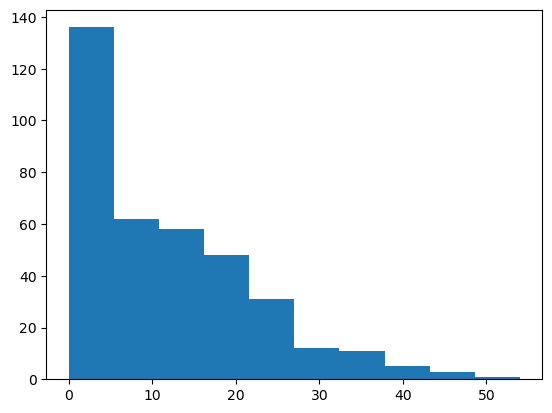

In [66]:
# Looking at the distribution of the target variable 
plt.hist(mlb_changed['HR'])

array([[<Axes: xlabel='HR', ylabel='HR'>,
        <Axes: xlabel='Barrels_2022', ylabel='HR'>,
        <Axes: xlabel='AVG_WAR', ylabel='HR'>,
        <Axes: xlabel='AVG_SLG', ylabel='HR'>,
        <Axes: xlabel='AVG_xwOBA', ylabel='HR'>,
        <Axes: xlabel='Barrels_2021', ylabel='HR'>],
       [<Axes: xlabel='HR', ylabel='Barrels_2022'>,
        <Axes: xlabel='Barrels_2022', ylabel='Barrels_2022'>,
        <Axes: xlabel='AVG_WAR', ylabel='Barrels_2022'>,
        <Axes: xlabel='AVG_SLG', ylabel='Barrels_2022'>,
        <Axes: xlabel='AVG_xwOBA', ylabel='Barrels_2022'>,
        <Axes: xlabel='Barrels_2021', ylabel='Barrels_2022'>],
       [<Axes: xlabel='HR', ylabel='AVG_WAR'>,
        <Axes: xlabel='Barrels_2022', ylabel='AVG_WAR'>,
        <Axes: xlabel='AVG_WAR', ylabel='AVG_WAR'>,
        <Axes: xlabel='AVG_SLG', ylabel='AVG_WAR'>,
        <Axes: xlabel='AVG_xwOBA', ylabel='AVG_WAR'>,
        <Axes: xlabel='Barrels_2021', ylabel='AVG_WAR'>],
       [<Axes: xlabel='HR', ylabel='AVG_

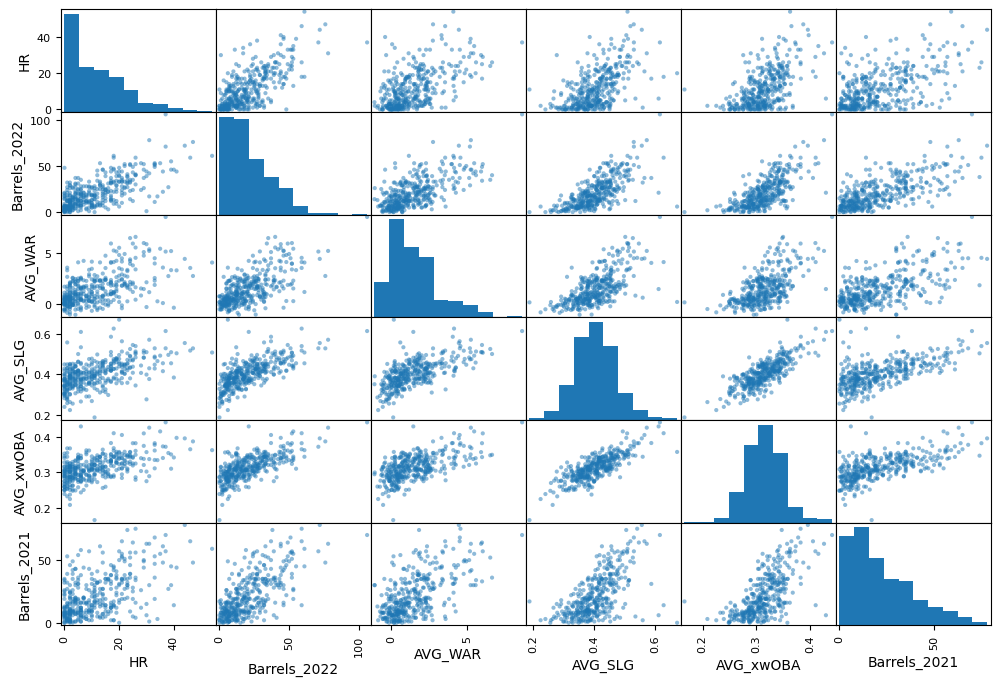

In [67]:
# Scatter matrix of top five most highly correlated features
from pandas.plotting import scatter_matrix
scatter_matrix(mlb_changed[['HR', 'Barrels_2022', 'AVG_WAR', 'AVG_SLG', 'AVG_xwOBA', 'Barrels_2021']], figsize=(12,8))

In [68]:
# Splitting data into train, validation, and test sets. Originally planned to use 70% train, 15% each validation and test. The small size of the 
# dataset and the severe skew of the response variable led me to increase the size of the test and validation sets so they are more likely to 
# be representative of the entire set. 
from sklearn.model_selection import train_test_split
mlb_train_full, mlb_val_test_full = train_test_split(mlb_changed, test_size = 0.4, random_state=42)
mlb_val_full, mlb_test_full = train_test_split(mlb_val_test_full, test_size = 0.5, random_state=42)

In [69]:
# Separating features and response from training, validation, test data sets
mlb_train_features = mlb_train_full.drop(columns=['HR'])
mlb_train_response = mlb_train_full['HR']
mlb_test_features = mlb_test_full.drop(columns=['HR'])
mlb_test_response = mlb_test_full['HR']
mlb_val_features = mlb_val_full.drop(columns=['HR'])
mlb_val_response = mlb_val_full['HR']

In [88]:
# Using a Random Forest due to its flexibility and robustness (no feature scaling, resistance to outliers and skew), and because the feature importances
# attribute can help eliminate unnecessary features to improve the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor(random_state=42)
rf.fit(mlb_train_features, mlb_train_response)
mlb_val_preds = rf.predict(mlb_val_features)
mse = mean_squared_error(mlb_val_response, mlb_val_preds)
rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MSE: 56.47070547945204
RMSE: 7.514699294013836


In [89]:
# Using features importances attribute to cut down the number of features to improve model performance
sorted(zip(rf.feature_importances_, mlb_train_features.columns), reverse=True)

[(0.3922340267138355, 'Barrels_2022'),
 (0.1329754226700634, 'AVG_SLG'),
 (0.055715536781959576, 'AVG_WAR'),
 (0.04768221293641651, 'sPA_2022'),
 (0.047073562834081865, 'AVG_Med%'),
 (0.03766276891714161, 'AVG_xwOBA'),
 (0.03581987707840333, 'HR/FB_2022'),
 (0.03453037824113628, 'maxEV_2022'),
 (0.030921774798429936, 'Hard%_2022'),
 (0.03040690635711794, 'Hard%_2021'),
 (0.02942978817729982, 'sPA_2021'),
 (0.02603648715990101, 'Barrels_2021'),
 (0.02223033586986546, 'Barrel%_2021'),
 (0.0218493642224949, 'IFH_2022'),
 (0.01998802872230369, 'AVG_xBA'),
 (0.018898911107959684, 'EV_2022'),
 (0.016544617411589458, 'AVG_HardHit%')]

In [97]:
train_limit = mlb_train_features.drop(columns=['AVG_HardHit%', 'EV_2022', 'AVG_xBA', 'IFH_2022', 'Barrel%_2021', 'Barrels_2021', 'sPA_2021',
                                              'Hard%_2021', 'Hard%_2022'])
val_limit = mlb_val_features.drop(columns=['AVG_HardHit%', 'EV_2022', 'AVG_xBA', 'IFH_2022', 'Barrel%_2021', 'Barrels_2021', 'sPA_2021',
                                          'Hard%_2021', 'Hard%_2022'])
rf.fit(train_limit, mlb_train_response)
mlb_val_preds = rf.predict(val_limit)
mse = mean_squared_error(mlb_val_response, mlb_val_preds)
rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MSE: 52.20438219178082
RMSE: 7.225260008593519


In [98]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[70, 80, 90, 100, 110, 120],
              'min_samples_split':[2, 4, 8, 12, 16, 20, 24, 32],
              'min_samples_leaf':[1, 2, 4, 6, 8, 12, 16, 20],
              'max_features':[1, 2, 4, 8, 12, 16]
              }
grid_search_cv = GridSearchCV(rf, param_grid, verbose=1, cv=2)
grid_search_cv.fit(train_limit, mlb_train_response)
print("The best parameters are: ", grid_search_cv.best_params_)
mlb_val_preds = grid_search_cv.best_estimator_.predict(val_limit)
mse = mean_squared_error(mlb_val_response, mlb_val_preds)
rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

Fitting 2 folds for each of 2304 candidates, totalling 4608 fits
The best parameters are:  {'max_features': 4, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 100}
MSE: 52.294840608189965
RMSE: 7.231517171948772


In [99]:
param_grid = {'n_estimators':[90, 95, 100, 105, 110],
              'min_samples_split':[2, 3, 4, 5, 6],
              'min_samples_leaf':[6, 7, 8, 9, 10, 11, 12],
              'max_features':[2, 3, 4, 5, 6, 7, 8]
              }
grid_search_cv = GridSearchCV(rf, param_grid, verbose=1, cv=2)
grid_search_cv.fit(train_limit, mlb_train_response)
print("The best parameters are: ", grid_search_cv.best_params_)
mlb_val_preds = grid_search_cv.best_estimator_.predict(val_limit)
mse = mean_squared_error(mlb_val_response, mlb_val_preds)
rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

Fitting 2 folds for each of 1225 candidates, totalling 2450 fits
The best parameters are:  {'max_features': 4, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 100}
MSE: 52.294840608189965
RMSE: 7.231517171948772


In [100]:
param_grid = {'max_depth':[2, 4, 6, 8, 10, 12, 14, 18, 20, 22, 24, 28, 32, None],
              'max_leaf_nodes':[2, 4, 6, 8, 10, 12, 14, 18, 20, 22, 24, 28, 32, None]
              }
grid_search_cv = GridSearchCV(RandomForestRegressor(random_state=42, max_features=4, min_samples_leaf=8, min_samples_split=2, n_estimators=100), 
                                                    param_grid, verbose=1, cv=2)
grid_search_cv.fit(train_limit, mlb_train_response)
print("The best parameters are: ", grid_search_cv.best_params_)
mlb_val_preds = grid_search_cv.best_estimator_.predict(val_limit)
mse = mean_squared_error(mlb_val_response, mlb_val_preds)
rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

Fitting 2 folds for each of 196 candidates, totalling 392 fits
The best parameters are:  {'max_depth': 4, 'max_leaf_nodes': 8}
MSE: 51.708975161554264
RMSE: 7.190895296244708


In [101]:
param_grid = {'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10, None],
              'max_leaf_nodes':[2, 4, 6, 7, 8, 9, 10, 11, 12, None]
              }
grid_search_cv = GridSearchCV(RandomForestRegressor(random_state=42, max_features=4, min_samples_leaf=8, min_samples_split=2, n_estimators=100), 
                                                    param_grid, verbose=1, cv=2)
grid_search_cv.fit(train_limit, mlb_train_response)
print("The best parameters are: ", grid_search_cv.best_params_)
mlb_val_preds = grid_search_cv.best_estimator_.predict(val_limit)
mse = mean_squared_error(mlb_val_response, mlb_val_preds)
rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

Fitting 2 folds for each of 100 candidates, totalling 200 fits
The best parameters are:  {'max_depth': 4, 'max_leaf_nodes': 8}
MSE: 51.708975161554264
RMSE: 7.190895296244708


In [105]:
param_grid = {'min_weight_fraction_leaf':[0.0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
              'min_impurity_decrease':[0.0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
              'oob_score':[True, False]
              }
grid_search_cv = GridSearchCV(RandomForestRegressor(random_state=42, max_features=4, min_samples_leaf=8, min_samples_split=2, n_estimators=100, 
                                                   max_depth=4, max_leaf_nodes=8), param_grid, verbose=1, cv=2)
grid_search_cv.fit(train_limit, mlb_train_response)
print("The best parameters are: ", grid_search_cv.best_params_)
mlb_val_preds = grid_search_cv.best_estimator_.predict(val_limit)
mse = mean_squared_error(mlb_val_response, mlb_val_preds)
rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

Fitting 2 folds for each of 98 candidates, totalling 196 fits
The best parameters are:  {'min_impurity_decrease': 0.0, 'min_weight_fraction_leaf': 0.1, 'oob_score': True}
MSE: 53.44053135981816
RMSE: 7.3103030963030635


In [108]:
# Best model
rf = RandomForestRegressor(random_state=42, max_features=4, min_samples_leaf=8, min_samples_split=2, n_estimators=100, 
                      max_depth=4, max_leaf_nodes=8, oob_score=True)
rf.fit(train_limit, mlb_train_response)
mlb_val_preds = rf.predict(val_limit)
mse = mean_squared_error(mlb_val_response, mlb_val_preds)
rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MSE: 51.708975161554264
RMSE: 7.190895296244708


In [109]:
test_limit = mlb_test_features.drop(columns=['AVG_HardHit%', 'EV_2022', 'AVG_xBA', 'IFH_2022', 'Barrel%_2021', 'Barrels_2021', 'sPA_2021',
                                             'Hard%_2021', 'Hard%_2022'])

In [110]:
# Test set performance
test_preds = rf.predict(test_limit)
mse = mean_squared_error(mlb_test_response, test_preds)
rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MSE: 51.03179515045037
RMSE: 7.143654187490487


In [111]:
# Train set score, just to be thorough
train_preds = rf.predict(train_limit)
mse = mean_squared_error(mlb_train_response, train_preds)
rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MSE: 40.80405137206234
RMSE: 6.387804894645917


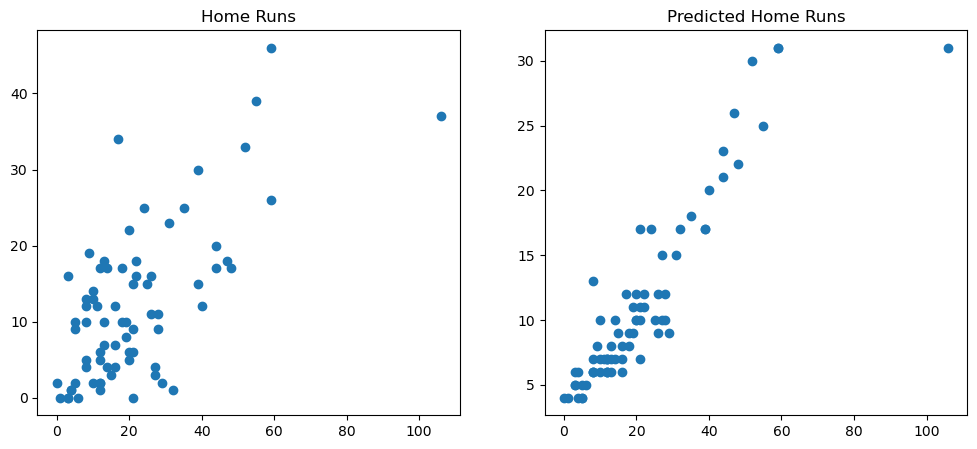

In [112]:
# Visualization of performance on the test set
x = mlb_test_full[['Barrels_2022', 'HR']]
y = pd.DataFrame({'HR_preds':test_preds})
x.reset_index(drop=True, inplace=True)
xy = x.merge(y, left_index=True, right_index=True)
xy.sort_values(by=['Barrels_2022'], inplace=True)
xy['HR_preds'] = round(xy['HR_preds'])
fig = plt.figure(figsize=[12,5])
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(xy['Barrels_2022'], xy['HR'])
ax1.set_title('Home Runs')
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(xy['Barrels_2022'], xy['HR_preds'])
ax2.set_title('Predicted Home Runs')
plt.savefig('Actual_vs_Predicted.png')

In [113]:
import joblib
joblib.dump(rf, 'Model.pkl', compress=1)

['Model.pkl']

In [114]:
train_limit.columns

Index(['maxEV_2022', 'Barrels_2022', 'HR/FB_2022', 'AVG_SLG', 'AVG_xwOBA',
       'AVG_WAR', 'AVG_Med%', 'sPA_2022'],
      dtype='object')

In [128]:
# This next section has nothing to do with the model. It is gathering data from years 2023 and 2022 of the top three HR hitters of 2023 and predicting
# their HR totals for 2024. I thought it would be interesting to include these predictions on the model deployment page.
top3 = hr.sort_values(by=['HR'], ascending=False).head(3)
list(top3['PlayerId'])

[14344, 16478, 19251]

In [129]:
bb2023 = pd.read_csv('bb2023fangraphs.csv')
war2023 = pd.read_csv('war2023fangraphs.csv')
sc2023 = pd.read_csv('sc2023fangraphs.csv')

In [130]:
top3 = bb2023.loc[bb2023['PlayerId'].isin(list(top3['PlayerId']))]

In [131]:
top3

,Name,Team,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH,...,BUH%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,NameASCII,PlayerId,MLBAMID
34,Matt Olson,ATL,0.301790,0.886598,0.177528,0.386517,0.435955,0.030928,0.278351,5,...,0.0,0.3820,0.3730,0.2449,0.1124,0.4607,0.4270,Matt Olson,14344,621566
85,Kyle Schwarber,PHI,0.208589,0.695652,0.161290,0.344086,0.494624,0.157609,0.255435,1,...,0.0,0.5389,0.3137,0.1475,0.1716,0.4370,0.3914,Kyle Schwarber,16478,656941
196,Pete Alonso,NYM,0.205333,0.766169,0.156770,0.365796,0.477435,0.109453,0.228856,7,...,0.0,0.4442,0.3254,0.2304,0.1639,0.4893,0.3468,Pete Alonso,19251,624413


In [132]:
top3.columns

Index(['Name', 'Team', 'BABIP', 'GB/FB', 'LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB',
       'IFH', 'IFH%', 'BUH', 'BUH%', 'Pull%', 'Cent%', 'Oppo%', 'Soft%',
       'Med%', 'Hard%', 'NameASCII', 'PlayerId', 'MLBAMID'],
      dtype='object')

In [133]:
bbtop = top3.copy()

In [134]:
bbtop.drop(columns=['Team', 'BABIP', 'GB/FB', 'LD%', 'GB%', 'FB%', 'IFFB%', 'IFH', 'IFH%', 'BUH', 'BUH%', 'Pull%', 'Cent%', 'Oppo%',
                   'Soft%', 'NameASCII', 'MLBAMID', 'Hard%'], inplace=True)
map = {'Med%':'Med%_2022', 'HR/FB':'HR/FB_2022'}
bbtop.rename(mapper=map, axis=1, inplace=True)

In [135]:
bbtop

,Name,HR/FB_2022,Med%_2022,PlayerId
34,Matt Olson,0.278351,0.4607,14344
85,Kyle Schwarber,0.255435,0.4370,16478
196,Pete Alonso,0.228856,0.4893,19251


In [136]:
top3 = war2023.loc[war2023['PlayerId'].isin(list(top3['PlayerId']))]

In [137]:
top3

,Name,Team,PA,IP,Bat WAR,Pit WAR,Total WAR,PlayerId
4,Matt Olson,ATL,720.0,NaN,6.703897,NaN,6.703897,14344
114,Pete Alonso,NYM,658.0,NaN,2.792964,NaN,2.792964,19251
293,Kyle Schwarber,PHI,720.0,NaN,1.437702,NaN,1.437702,16478


In [138]:
wartop = top3.copy()
wartop.drop(columns=['Name', 'Team', 'PA', 'IP', 'Pit WAR', 'Total WAR'], inplace=True)
map = {'Bat WAR':'WAR_2022'}
wartop.rename(mapper=map, axis=1, inplace=True)
wartop

,WAR_2022,PlayerId
4,6.703897,14344
114,2.792964,19251
293,1.437702,16478


In [145]:
top3 = sc2023.loc[sc2023['PlayerId'].isin(list(top3['PlayerId']))]
sctop = top3.copy()
sctop

,Name,Team,PA,Events,EV,maxEV,LA,Barrels,Barrel%,HardHit,HardHit%,AVG,xBA,SLG,xSLG,wOBA,xwOBA,NameASCII,PlayerId,MLBAMID
19,Matt Olson,ATL,720,445,93.713964,118.618,16.079843,73.0,0.1640,245.0,0.5506,0.282895,0.263,0.603618,0.561,0.412758,0.394,Matt Olson,14344,621566
34,Pete Alonso,NYM,658,421,89.459379,115.745,18.152114,62.0,0.1473,168.0,0.3990,0.216549,0.244,0.503521,0.528,0.345716,0.370,Pete Alonso,19251,624413
45,Kyle Schwarber,PHI,720,373,92.365591,115.222,18.989247,61.0,0.1635,181.0,0.4853,0.196581,0.219,0.473504,0.485,0.350091,0.365,Kyle Schwarber,16478,656941


In [146]:
train_limit.columns

Index(['maxEV_2022', 'Barrels_2022', 'HR/FB_2022', 'AVG_SLG', 'AVG_xwOBA',
       'AVG_WAR', 'AVG_Med%', 'sPA_2022'],
      dtype='object')

In [147]:
sctop.drop(columns=['Name', 'Team', 'Events', 'LA', 'AVG', 'xBA', 'xSLG', 'wOBA', 'NameASCII', 'MLBAMID', 'EV', 'Barrel%', 'HardHit',
                   'HardHit%'], inplace=True)
map={'maxEV':'maxEV_2022', 'Barrels':'Barrels_2022', 'SLG':'SLG_2022', 'PA':'PA_2022',
     'xwOBA':'xwOBA_2022'}
sctop.rename(mapper=map, axis=1, inplace=True)
sctop

,PA_2022,maxEV_2022,Barrels_2022,SLG_2022,xwOBA_2022,PlayerId
19,720,118.618,73.0,0.603618,0.394,14344
34,658,115.745,62.0,0.503521,0.370,19251
45,720,115.222,61.0,0.473504,0.365,16478


In [148]:
m2023 = bbtop.merge(wartop, on='PlayerId')

In [149]:
m2023

,Name,HR/FB_2022,Med%_2022,PlayerId,WAR_2022
0,Matt Olson,0.278351,0.4607,14344,6.703897
1,Kyle Schwarber,0.255435,0.4370,16478,1.437702
2,Pete Alonso,0.228856,0.4893,19251,2.792964


In [150]:
m2023 = m2023.merge(sctop, on='PlayerId')
m2023

,Name,HR/FB_2022,Med%_2022,PlayerId,WAR_2022,PA_2022,maxEV_2022,Barrels_2022,SLG_2022,xwOBA_2022
0,Matt Olson,0.278351,0.4607,14344,6.703897,720,118.618,73.0,0.603618,0.394
1,Kyle Schwarber,0.255435,0.4370,16478,1.437702,720,115.222,61.0,0.473504,0.365
2,Pete Alonso,0.228856,0.4893,19251,2.792964,658,115.745,62.0,0.503521,0.370


In [152]:
m2023['sPA_2022'] = round(np.sqrt(m2023['PA_2022']))
m2023.drop(columns=['PA_2022'], inplace=True)
m2023

,Name,HR/FB_2022,Med%_2022,PlayerId,WAR_2022,maxEV_2022,Barrels_2022,SLG_2022,xwOBA_2022,sPA_2022
0,Matt Olson,0.278351,0.4607,14344,6.703897,118.618,73.0,0.603618,0.394,27.0
1,Kyle Schwarber,0.255435,0.4370,16478,1.437702,115.222,61.0,0.473504,0.365,27.0
2,Pete Alonso,0.228856,0.4893,19251,2.792964,115.745,62.0,0.503521,0.370,26.0


In [153]:
bb = mlb_2022_bb.copy()
sc = mlb_2022_sc.copy() 
war = mlb_2022_war.copy() 

In [155]:
top3 = bb.loc[bb['PlayerId'].isin(list(top3['PlayerId']))]
bbtop = top3.copy()
bbtop.drop(columns=['Team', 'BABIP', 'GB/FB', 'LD%', 'GB%', 'FB%', 'IFFB%', 'IFH', 'IFH%', 'BUH', 'BUH%', 'Pull%', 'Cent%', 'Oppo%',
                   'Soft%', 'NameASCII', 'MLBAMID', 'HR/FB', 'Hard%'], inplace=True)
map = {'Med%':'Med%_2021'}
bbtop.rename(mapper=map, axis=1, inplace=True)
bbtop

,Name,Med%_2021,PlayerId
47,Matt Olson,0.4444,14344
54,Kyle Schwarber,0.4512,16478
165,Pete Alonso,0.4854,19251


In [156]:
top3 = war.loc[war['PlayerId'].isin(list(top3['PlayerId']))]
wartop = top3.copy()
wartop.drop(columns=['Name', 'Team', 'PA', 'IP', 'Pit WAR', 'Total WAR'], inplace=True)
map = {'Bat WAR':'WAR_2021'}
wartop.rename(mapper=map, axis=1, inplace=True)
wartop

,WAR_2021,PlayerId
70,3.841414,19251
93,3.175242,14344
129,2.655746,16478


In [157]:
top3 = sc.loc[sc['PlayerId'].isin(list(top3['PlayerId']))]
sctop = top3.copy()
sctop

,Name,Team,PA,Events,EV,maxEV,LA,Barrels,Barrel%,HardHit,HardHit%,AVG,xBA,SLG,xSLG,wOBA,xwOBA,NameASCII,PlayerId,MLBAMID
18,Kyle Schwarber,PHI,669,379,93.253719,114.765,19.186196,76.0,0.2005,206.0,0.5435,0.218371,0.237,0.504333,0.535,0.354579,0.375,Kyle Schwarber,16478,656941
46,Pete Alonso,NYM,685,478,89.794767,116.542,18.220229,59.0,0.1234,213.0,0.4456,0.271357,0.262,0.517588,0.486,0.365731,0.353,Pete Alonso,19251,624413
64,Matt Olson,ATL,699,450,92.865627,116.775,16.069844,61.0,0.1356,229.0,0.5089,0.240260,0.248,0.477273,0.467,0.343762,0.347,Matt Olson,14344,621566


In [158]:
train_limit.columns

Index(['maxEV_2022', 'Barrels_2022', 'HR/FB_2022', 'AVG_SLG', 'AVG_xwOBA',
       'AVG_WAR', 'AVG_Med%', 'sPA_2022'],
      dtype='object')

In [159]:
sctop.drop(columns=['Name', 'Team', 'PA', 'Events', 'LA', 'AVG', 'xBA', 'xSLG', 'wOBA', 'NameASCII', 'MLBAMID', 'Barrels', 'HardHit%',
                   'Barrel%', 'EV', 'maxEV', 'HardHit'], inplace=True)
map={'SLG':'SLG_2021', 
     'xwOBA':'xwOBA_2021'}
sctop.rename(mapper=map, axis=1, inplace=True)
sctop

,SLG_2021,xwOBA_2021,PlayerId
18,0.504333,0.375,16478
46,0.517588,0.353,19251
64,0.477273,0.347,14344


In [160]:
m2022 = bbtop.merge(wartop, on='PlayerId')

In [161]:
m2022 = m2022.merge(sctop, on='PlayerId')

In [162]:
m2022

,Name,Med%_2021,PlayerId,WAR_2021,SLG_2021,xwOBA_2021
0,Matt Olson,0.4444,14344,3.175242,0.477273,0.347
1,Kyle Schwarber,0.4512,16478,2.655746,0.504333,0.375
2,Pete Alonso,0.4854,19251,3.841414,0.517588,0.353


In [165]:
m2022.drop(columns=['Name'], inplace=True)
pred2024 = m2023.merge(m2022, on='PlayerId')

In [166]:
pred2024

,Name,HR/FB_2022,Med%_2022,PlayerId,WAR_2022,maxEV_2022,Barrels_2022,SLG_2022,xwOBA_2022,sPA_2022,Med%_2021,WAR_2021,SLG_2021,xwOBA_2021
0,Matt Olson,0.278351,0.4607,14344,6.703897,118.618,73.0,0.603618,0.394,27.0,0.4444,3.175242,0.477273,0.347
1,Kyle Schwarber,0.255435,0.4370,16478,1.437702,115.222,61.0,0.473504,0.365,27.0,0.4512,2.655746,0.504333,0.375
2,Pete Alonso,0.228856,0.4893,19251,2.792964,115.745,62.0,0.503521,0.370,26.0,0.4854,3.841414,0.517588,0.353


In [167]:
pred2024['AVG_Med%'] = (pred2024['Med%_2021'] + pred2024['Med%_2022']) / 2
pred2024['AVG_SLG'] = (pred2024['SLG_2021'] + pred2024['SLG_2022']) / 2
pred2024['AVG_WAR'] = (pred2024['WAR_2021'] + pred2024['WAR_2022']) / 2
pred2024['AVG_xwOBA'] = (pred2024['xwOBA_2021'] + pred2024['xwOBA_2022']) / 2
pred2024.drop(columns=['Med%_2021', 'Med%_2022', 'SLG_2021', 'SLG_2022', 'WAR_2021', 'WAR_2022', 'xwOBA_2021', 'xwOBA_2022'], inplace=True)
pred2024

,Name,HR/FB_2022,PlayerId,maxEV_2022,Barrels_2022,sPA_2022,AVG_Med%,AVG_SLG,AVG_WAR,AVG_xwOBA
0,Matt Olson,0.278351,14344,118.618,73.0,27.0,0.45255,0.540446,4.939569,0.3705
1,Kyle Schwarber,0.255435,16478,115.222,61.0,27.0,0.44410,0.488919,2.046724,0.3700
2,Pete Alonso,0.228856,19251,115.745,62.0,26.0,0.48735,0.510555,3.317189,0.3615


In [168]:
pnames = list(pred2024['Name'])

In [169]:
pnames

['Matt Olson', 'Kyle Schwarber', 'Pete Alonso']

In [170]:
pred2024 = pred2024[['maxEV_2022', 'Barrels_2022', 'HR/FB_2022', 'AVG_SLG', 'AVG_xwOBA', 'AVG_WAR', 'AVG_Med%', 'sPA_2022']]

In [172]:
hr2024 = rf.predict(pred2024)

In [173]:
preds_2024 = zip(pnames, hr2024)

In [174]:
for name, hr in preds_2024:
    print(f"{name}: {round(hr)}")

Matt Olson: 31
Kyle Schwarber: 30
Pete Alonso: 30


In [176]:
train_limit

,maxEV_2022,Barrels_2022,HR/FB_2022,AVG_SLG,AVG_xwOBA,AVG_WAR,AVG_Med%,sPA_2022
219,115.010,9.0,0.128205,0.346849,0.2955,-0.575991,0.50425,12.449900
107,110.720,12.0,0.112903,0.386496,0.3070,-0.221065,0.48685,15.524175
80,112.462,39.0,0.175758,0.496260,0.3385,2.297333,0.45730,22.847319
268,104.833,3.0,0.000000,0.310207,0.2890,2.668812,0.63660,24.413111
111,112.552,46.0,0.140244,0.455114,0.3525,2.296051,0.53620,23.748684
...,...,...,...,...,...,...,...,...
82,112.369,32.0,0.142857,0.443414,0.3140,0.180091,0.45405,21.748563
121,108.353,1.0,0.000000,0.276538,0.3025,-0.320900,0.40615,6.000000
298,112.104,9.0,0.077922,0.403157,0.2940,0.613499,0.50945,17.233688
393,108.997,2.0,0.027027,0.297472,0.2510,0.033288,0.67395,12.767145
